# Прогнозирование временных рядов при помощи машинного обучения. Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Предобработка временного ряда

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

Оставим только целевой ряд (`quantity`)

In [3]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


Посмотрим как ведет себя временной ряд

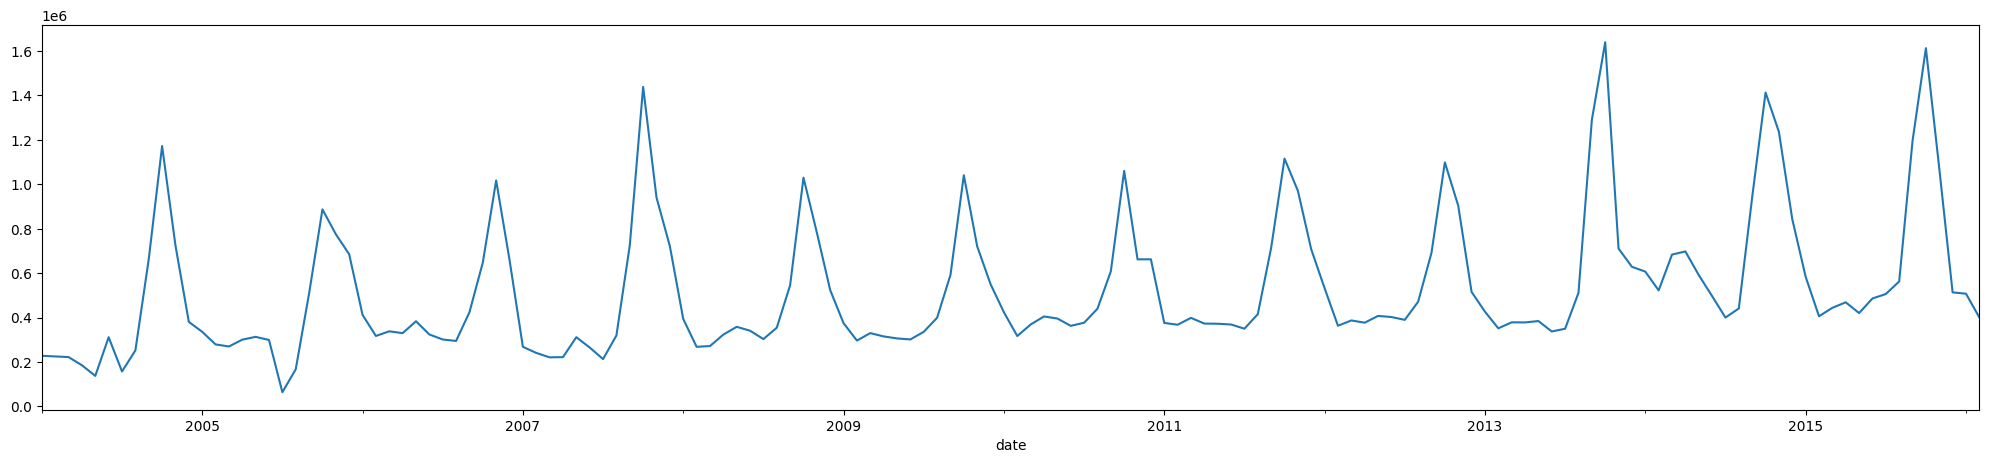

In [4]:
ts.quantity.plot(figsize=(25,5));

## Машинное обучение для прогнозирования временных рядов

## Задание

Извлеките первые 7 лаговых признаков из ряда (лаг на 1, 2 ... 7 месяцев).

Чему равно первое (самое старое) известное значение лага 4 периода назад (lag_4)? Ответ округлите до целого числа.

In [4]:
ts.quantity.shift(1)

date
2004-01          NaN
2004-02     227832.0
2004-03     225133.0
2004-04     221952.0
2004-05     185150.0
             ...    
2015-10    1194608.0
2015-11    1612160.0
2015-12    1071872.0
2016-01     513186.0
2016-02     507223.0
Freq: M, Name: quantity, Length: 146, dtype: float64

Выкиньте строчки с пропущенными значениями.

In [5]:
for i in range(1, 8):
    ts[f"lag_{i}"] = ts['quantity'].shift(i)

In [7]:
ts.head(8)

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-01,227832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,225133,227832.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,221952,225133.0,227832.0,NaN,NaN,NaN,NaN,NaN
2004-04,185150,221952.0,225133.0,227832.0,NaN,NaN,NaN,NaN
2004-05,137390,185150.0,221952.0,225133.0,227832.0,NaN,NaN,NaN
2004-06,311445,137390.0,185150.0,221952.0,225133.0,227832.0,NaN,NaN
2004-07,157022,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,NaN
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0


In [6]:
ts.dropna(inplace=True)

ts.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0


In [9]:
ts.loc['2004-08', 'lag_4']

185150.0

### Разбиение на train и test для временных рядов

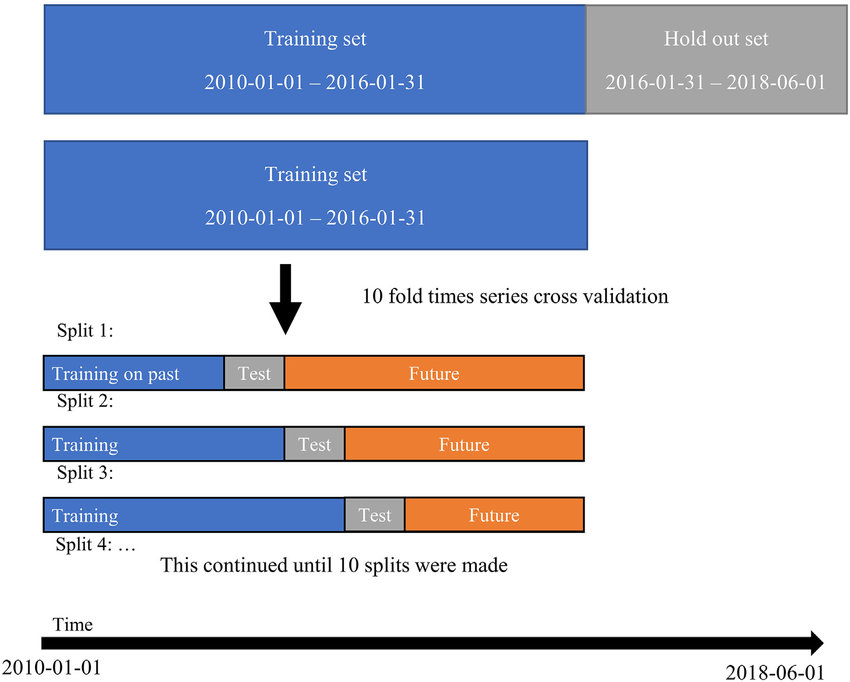

## Задание

Разбейте данные (quantity) на train и test.

train - первые 85% данных

test - следующие 15% данных

Сколько измерений попало в тестовую часть?

In [7]:
split_index = int(0.85*len(ts))

Train = ts.iloc[:split_index]
Test = ts.iloc[split_index:]

In [11]:
ts.shape, Train.shape, Test.shape

((139, 8), (118, 8), (21, 8))

## Задание

Разбейте тренировочные и тестовые данные на матрицы объект-признак `X_train`, `X_test` и векторы с целевой переменной `y_train`, `y_test`.

Чему равно среднее значение `y_test`? Ответ округлите до целого числа

In [12]:
Train.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0


In [8]:
X_train = Train.drop('quantity', axis=1)
y_train = Train['quantity']

X_test = Test.drop('quantity', axis=1)
y_test = Test['quantity']

In [10]:
ytest.mean()

711637.0

In [23]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,
2004-08,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0
...,...,...,...,...,...,...,...
2014-01,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0,337186.0
2014-02,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0
2014-03,522132.0,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0


## Прогнозирование временных рядов

Обратите внимание, что в функции мы сами по индексу разбили датасет на обучающую и валидационную выборку для обучения моделей. Мы не можем воспользовать train_test_split, так как нам необходимо сохранять хронологию в деление выборки на части, т.е. случайное сэмплирование наблюдений нам не подойдет, в частности, т.к. мы хотим выучить тренд в данных.

## Задание

Обучите линейную регрессию на тренировочных данных и посчитайте $R^2$ на тесте.

Ответ округлите до сотых.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5010248271570557

## Агрегированные признаки

Используем функцию, которая возвращает словарь, где ключами являются уникальные категории признака `cat_feature`, а значениями - средние по `real_feature`.

In [12]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

## Задание

Создайте колонку `month`, содержащую месяц (из даты).

Вычислите среднее значение целевой переменной по месяцам (по всем обучающим данным до разбиения на train и test).

В какой месяц года среднее количество проданного товара максимально? В ответе укажите номер месяца.

In [13]:
ts['month'] = ts.index.to_timestamp().month

In [14]:
ts.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,month
date,,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,8
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,9
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,10
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,11
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,12


In [15]:
code_mean(ts, 'month', 'quantity')

{1: 436629.0833333333,
 2: 344012.0,
 3: 371731.36363636365,
 4: 380720.8181818182,
 5: 385653.45454545453,
 6: 362042.2727272727,
 7: 326113.2727272727,
 8: 385456.6666666667,
 9: 741183.9166666666,
 10: 1179204.8333333333,
 11: 876030.3333333334,
 12: 615578.75}

Далее будем использовать функцию preprocess_data.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [18]:
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [20]:
index_cut = int(0.815*len(ts))

In [21]:
def preprocess_data(data, lag_start=1, lag_end=8, index_cut=index_cut):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['quantity'].shift(i)

    data = data.dropna()

    data["month"] = data.index.month

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["month_average"] = list(map(code_mean(data.iloc[:index_cut], "month", "quantity").get, data.month))

    # выкидываем закодированные средними признаки
    data.drop(["month"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:index_cut].drop(["quantity"], axis=1)
    y_train = data.iloc[:index_cut]["quantity"]
    X_test = data.iloc[index_cut:].drop(["quantity"], axis=1)
    y_test = data.iloc[index_cut:]["quantity"]

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = preprocess_data(ts)

X_train.shape, X_test.shape

((118, 8), (21, 8))

## Задание

Обучите линейную регрессию на подготовленных тренировочных данных и выведите $R^2$ на тесте.

Ответ округлите до сотых.

In [25]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7439158650185

## Задание

Заново разбейте данные на train и test, используя `preprocess_data` с лагами от 1 до 12 не включительно.

Обучите линейную регрессию. Чему теперь равен $R^2$? Ответ округлите до сотых.

In [26]:
X_train, X_test, y_train, y_test = preprocess_data(ts, lag_end=12)

X_train.shape, X_test.shape

((118, 12), (17, 12))

In [27]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8591152640658721

## Задание

Обучите CatBoostRegressor с гиперпараметрами по умолчанию на тех же данных, что и линейную регрессию из предыдущего задания. Чему теперь равен $R^2$? Ответ округлите до десятых.

In [23]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [28]:
from catboost import CatBoostRegressor

model = CatBoostRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

Learning rate set to 0.02921
0:	learn: 265587.3165548	total: 48ms	remaining: 48s
1:	learn: 261071.8931381	total: 49.4ms	remaining: 24.6s
2:	learn: 257368.8273561	total: 50.8ms	remaining: 16.9s
3:	learn: 253479.6090882	total: 52.1ms	remaining: 13s
4:	learn: 249768.1752293	total: 54ms	remaining: 10.7s
5:	learn: 246291.4309278	total: 56.7ms	remaining: 9.39s
6:	learn: 243507.5633421	total: 59.6ms	remaining: 8.45s
7:	learn: 240550.1037802	total: 62.2ms	remaining: 7.71s
8:	learn: 237176.9677208	total: 65ms	remaining: 7.16s
9:	learn: 233132.0312718	total: 66.6ms	remaining: 6.59s
10:	learn: 230177.1660152	total: 68.2ms	remaining: 6.13s
11:	learn: 226849.9185607	total: 69.8ms	remaining: 5.75s
12:	learn: 223704.5036253	total: 71.4ms	remaining: 5.42s
13:	learn: 221180.3745426	total: 72.9ms	remaining: 5.13s
14:	learn: 218267.8346022	total: 74.6ms	remaining: 4.9s
15:	learn: 214548.8285753	total: 76.3ms	remaining: 4.69s
16:	learn: 211767.5314004	total: 77.9ms	remaining: 4.51s
17:	learn: 208769.89571

0.6115594538881034

## Бонусное задание (не проверяется тестами)

Попробуйте использовать в качестве экзогенного фактора `priceMod` из исходных данных.

Также пробуйте любые модели регрессии и любые наборы гиперпараметров.

Единственное требование: в тесте - те же 21 измерений.

Какого наилучшего значения $R^2$ на тесте вам удалось добиться?

In [ ]:
# your code here